<a href="https://colab.research.google.com/github/workingbetter/Machine_Learning/blob/main/merged_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Best parameters for Logistic Regression:  {'C': 0.001, 'solver': 'liblinear'}
Best score for Logistic Regression:  0.7714285714285715

Best parameters for Decision Tree:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}
Best score for Decision Tree:  0.7695238095238095

Best parameters for Neural Network:  {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)}
Best score for Neural Network:  0.769047619047619

Test accuracy for Logistic Regression:  0.7777777777777778
Test accuracy for Decision Tree:  0.5555555555555556
Test accuracy for Neural Network:  0.8518518518518519

Test precision for Logistic Regression:  0.7777777777777778
Test precision for Decision Tree:  0.42857142857142855
Test precision for Neural Network:  0.8888888888888888

Test recall for Logistic Regression:  0.6363636363636364
Test recall for Decision Tree:  0.2727272727272727
Test recall for Neural Network:  0.7272727272727273

Test F1 score for Logistic Regression:  0.7000000000000

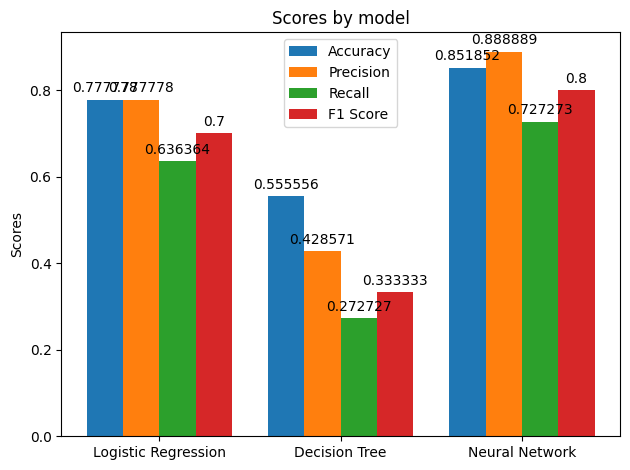

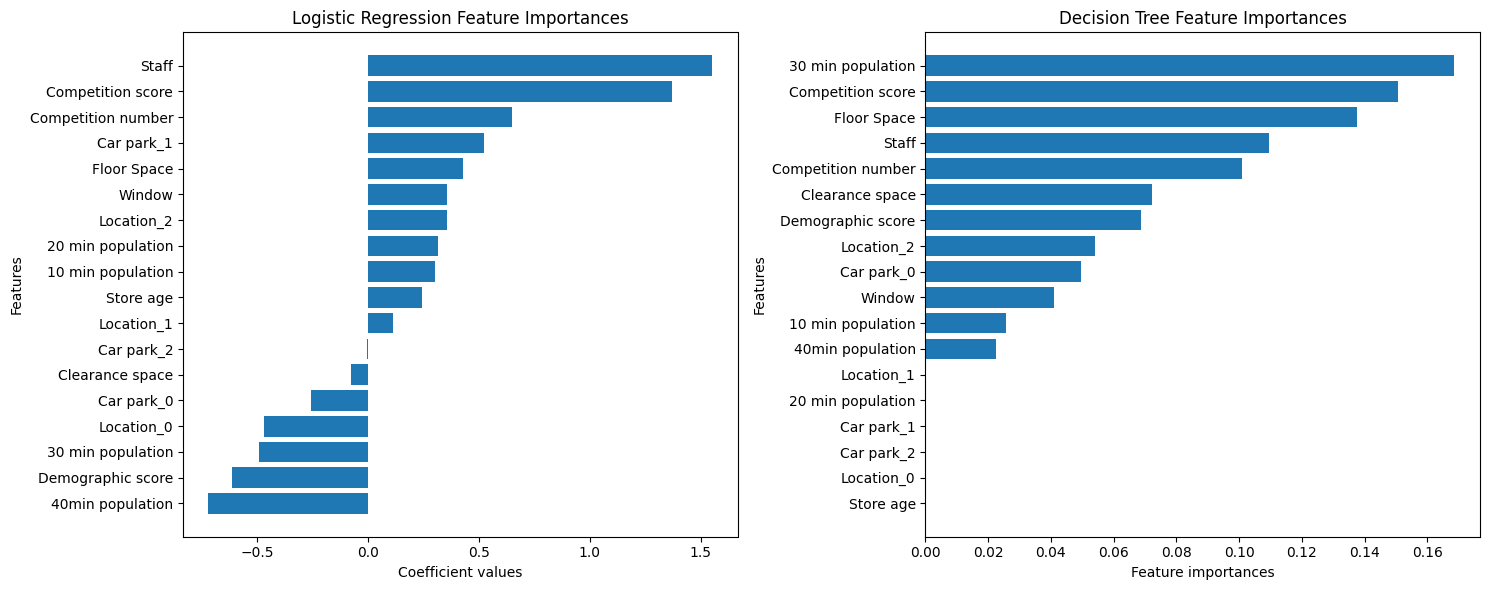

Based on the evaluation metrics, the best model for this dataset is:
Neural Network

Remember that each model has its strengths and weaknesses, and the choice of the best model should be based on the specific problem and requirements.


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mstats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Read the dataset
df_original = pd.read_csv("/content/drive/MyDrive/Machine learning/project/storedata.csv")

# Data cleaning

# Check for missing values in each column
# No missing value found
#print(df.isnull().sum())

# Check for duplicate rows
# No duplicates
# print("Number of duplicate rows:", df.duplicated().sum())
df = df_original.copy()
# Replace corrupted strings in the 'Car park' column
df['Car park'] = df['Car park'].str.replace('Y', 'Yes').replace('N', 'No')

# Filter rows based on the 'Staff' and 'Location' column values
df = df[(df.Staff < 100) & (df.Staff > 0) & (df.Location != "Village")]
df.reset_index(drop=True)

# Handling outliers - Winsorizing
outliers = ['30 min population', '20 min population', '10 min population', 'Clearance space']
for i in outliers:
    df.loc[:, i] = mstats.winsorize(df[i], limits=[0.05, 0.05])

# Encode target variable as 1 for 'Good' and 0 for 'Bad'
df['Performance'] = df['Performance'].map({'Good': 1, 'Bad': 0})

# Drop unwanted columns
df = df.drop(columns=['Town', 'Country', 'Store ID', 'Manager name'])

# Separate the features (X) and target (y)
X = df.drop('Performance', axis=1)
y = df['Performance']

# Encode categorical variables
le = LabelEncoder()
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    X_encoded[col] = le.fit_transform(X_encoded[col])

# One-hot encoding of categorical features
X_encoded = pd.get_dummies(X_encoded, columns=["Car park", "Location"])

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Initialize models
logreg = LogisticRegression(random_state=3071806, max_iter=1000)
tree = DecisionTreeClassifier(random_state=3071806)
nn = MLPClassifier(max_iter=5000, random_state=3071806)

# Train models
logreg.fit(X_train_scaled, y_train)
tree.fit(X_train_scaled, y_train)
nn.fit(X_train_scaled, y_train)



# Hyperparameter tuning for Logistic Regression
param_grid_logreg = {"C": [0.001, 0.01, 0.1, 10, 100], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}
scorer = make_scorer(f1_score)

# Grid search for Logistic Regression
grid_logreg = GridSearchCV(logreg, param_grid_logreg, scoring=scorer, cv=5, n_jobs=-1)
grid_logreg.fit(X_val_scaled, y_val)

# Get best parameters and score for Logistic Regression
best_params_logreg = grid_logreg.best_params_
best_score_logreg = grid_logreg.best_score_

# Print best parameters and score for Logistic Regression
print("\nBest parameters for Logistic Regression: ", best_params_logreg)
print("Best score for Logistic Regression: ", best_score_logreg)

# Hyperparameter tuning for Decision Tree
param_grid_tree = {"max_depth": list(range(1, 20)), "criterion": ["gini", "entropy"], "min_samples_split": [2, 5, 10, 20]}

# Grid search for Decision Tree
grid_tree = GridSearchCV(tree, param_grid_tree, scoring=scorer, cv=5, n_jobs=-1)
grid_tree.fit(X_val_scaled, y_val)

# Get best parameters and score for Decision Tree
best_params_tree = grid_tree.best_params_
best_score_tree = grid_tree.best_score_

# Print best parameters and score for Decision Tree
print("\nBest parameters for Decision Tree: ", best_params_tree)
print("Best score for Decision Tree: ", best_score_tree)

# Hyperparameter tuning for Neural Network
param_grid_nn = {"hidden_layer_sizes": [(50, 50), (100, 50), (100, 100)], "alpha": [0.0001, 0.001, 0.01, 0.1], "activation": ["relu", "tanh"]}

# Grid search for Neural Network
grid_nn = GridSearchCV(nn, param_grid_nn, scoring=scorer, cv=5, n_jobs=-1)
grid_nn.fit(X_val_scaled, y_val)

# Get best parameters and score for Neural Network
best_params_nn = grid_nn.best_params_
best_score_nn = grid_nn.best_score_

# Print best parameters and score for Neural Network
print("\nBest parameters for Neural Network: ", best_params_nn)
print("Best score for Neural Network: ", best_score_nn)

# Fit models with tuned hyperparameters
logreg_tuned = LogisticRegression(**best_params_logreg, random_state=3071806, max_iter=1000)
tree_tuned = DecisionTreeClassifier(**best_params_tree, random_state=3071806)
nn_tuned = MLPClassifier(**best_params_nn, max_iter=5000, random_state=3071806)

# Train tuned models
logreg_tuned.fit(X_train_scaled, y_train)
tree_tuned.fit(X_train_scaled, y_train)
nn_tuned.fit(X_train_scaled, y_train)

# Evaluate models on test set
y_pred_logreg = logreg_tuned.predict(X_test_scaled)
y_pred_tree = tree_tuned.predict(X_test_scaled)
y_pred_nn = nn_tuned.predict(X_test_scaled)

# Calculate evaluation metrics for each model
acc_logreg = accuracy_score(y_test, y_pred_logreg)
acc_tree = accuracy_score(y_test, y_pred_tree)
acc_nn = accuracy_score(y_test, y_pred_nn)

prec_logreg = precision_score(y_test, y_pred_logreg)
prec_tree = precision_score(y_test, y_pred_tree)
prec_nn = precision_score(y_test, y_pred_nn)

recall_logreg = recall_score(y_test, y_pred_logreg)
recall_tree = recall_score(y_test, y_pred_tree)
recall_nn = recall_score(y_test, y_pred_nn)

f1_logreg = f1_score(y_test, y_pred_logreg)
f1_tree = f1_score(y_test, y_pred_tree)
f1_nn = f1_score(y_test, y_pred_nn)

# Print evaluation metrics for each model
print("\nTest accuracy for Logistic Regression: ", acc_logreg)
print("Test accuracy for Decision Tree: ", acc_tree)
print("Test accuracy for Neural Network: ", acc_nn)

print("\nTest precision for Logistic Regression: ", prec_logreg)
print("Test precision for Decision Tree: ", prec_tree)
print("Test precision for Neural Network: ", prec_nn)

print("\nTest recall for Logistic Regression: ", recall_logreg)
print("Test recall for Decision Tree: ", recall_tree)
print("Test recall for Neural Network: ", recall_nn)

print("\nTest F1 score for Logistic Regression: ", f1_logreg)
print("Test F1 score for Decision Tree: ", f1_tree)
print("Test F1 score for Neural Network: ", f1_nn)

# Plot the results
labels = ["Logistic Regression", "Decision Tree", "Neural Network"]
accuracy_values = [acc_logreg, acc_tree, acc_nn]
precision_values = [prec_logreg, prec_tree, prec_nn]
recall_values = [recall_logreg, recall_tree, recall_nn]
f1_values = [f1_logreg, f1_tree, f1_nn]

x = np.arange(len(labels)) # the label locations
width = 0.2 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - 3 * width / 2, accuracy_values, width, label='Accuracy')
rects2 = ax.bar(x - width / 2, precision_values, width, label='Precision')
rects3 = ax.bar(x + width / 2, recall_values, width, label='Recall')
rects4 = ax.bar(x + 3 * width / 2, f1_values, width, label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)
ax.bar_label(rects4, padding=3)

fig.tight_layout()
plt.show()

# Feature importances
# For Logistic Regression
importance_logreg = logreg.coef_[0]
sorted_idx_logreg = np.argsort(importance_logreg)
logreg_feature_names = X_train.columns[sorted_idx_logreg]

# For Decision Tree
importance_tree = tree.feature_importances_
sorted_idx_tree = np.argsort(importance_tree)
tree_feature_names = X_train.columns[sorted_idx_tree]

# Plot feature importances
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.barh(logreg_feature_names, importance_logreg[sorted_idx_logreg])
ax1.set_title("Logistic Regression Feature Importances")
ax1.set_xlabel("Coefficient values")
ax1.set_ylabel("Features")

ax2.barh(tree_feature_names, importance_tree[sorted_idx_tree])
ax2.set_title("Decision Tree Feature Importances")
ax2.set_xlabel("Feature importances")
ax2.set_ylabel("Features")

plt.tight_layout()
plt.show()

# Conclusion
print("Based on the evaluation metrics, the best model for this dataset is:")
if acc_nn > acc_logreg and acc_nn > acc_tree:
    print("Neural Network")
elif acc_logreg > acc_nn and acc_logreg > acc_tree:
    print("Logistic Regression")
else:
    print("Decision Tree")

print("\nRemember that each model has its strengths and weaknesses, and the choice of the best model should be based on the specific problem and requirements.")

